<a href="https://colab.research.google.com/github/suzam26/AI-Expert-Roadmap/blob/main/RNN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN with Keras

This section makes use of the Nigeria power consumption univariate timeseries dataset to implement a LSTM Recurrent Neural Network.

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# data url
url = "/content/nigeria-power-consumption.csv"

# load data
parse_date = lambda dates: pd.datetime.strptime(dates, '%d-%m')
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month',
                   date_parser=parse_date,
                   engine='python', skipfooter=2)

# print column name
data.columns

# change column names
data.rename(columns={'Nigeria power consumption': 'power-consumption'},
            inplace=True)

# split in training and evaluation set
data_train, data_eval = train_test_split(data, test_size=0.2, shuffle=False)

# MinMaxScaler - center ans scale the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_train = scaler.fit_transform(data_train)
data_eval = scaler.fit_transform(data_eval)

# adjust univariate data for timeseries prediction
def convert_to_sequences(data, sequence, is_target=False):
    temp_df = []
    for i in range(len(data) - sequence):
        if is_target:
            temp_df.append(data[(i+1): (i+1) + sequence])
        else:
            temp_df.append(data[i: i + sequence])
    return np.array(temp_df)

# parameters
time_steps = 20
inputs = 1
neurons = 100
outputs = 1
batch_size = 32

# create training and testing data
train_x = convert_to_sequences(data_train, time_steps, is_target=False)
train_y = convert_to_sequences(data_train, time_steps, is_target=True)

eval_x = convert_to_sequences(data_eval, time_steps, is_target=False)
eval_y = convert_to_sequences(data_eval, time_steps, is_target=True)

# Build model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2,
                               input_shape=train_x.shape[1:],
                               return_sequences=True))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse'])

# print model summary
model.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 128)           66560     
                                                                 
 dense (Dense)               (None, 20, 1)             129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=20, shuffle=False,
                    validation_data=(eval_x, eval_y))

Epoch 1/20
3/3 [==============================] - 3s 242ms/step - loss: 0.1333 - mse: 0.1333 - val_loss: 0.1469 - val_mse: 0.1469
Epoch 2/20
3/3 [==============================] - 0s 56ms/step - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0784 - val_mse: 0.0784
Epoch 3/20
3/3 [==============================] - 0s 55ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 4/20
3/3 [==============================] - 0s 63ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 5/20
3/3 [==============================] - 0s 55ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 6/20
3/3 [==============================] - 0s 60ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 7/20
3/3 [==============================] - 0s 56ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 8/20
3/3 [==============================] - 0s 56ms/step - loss: 0.0180 - mse: 0.0180 - va

1/1 [==============================] - 0s 26ms/step - loss: 0.0250 - mse: 0.0250
Test loss: 0.0250
Test mse: 0.0250


Text(0.5, 0, 'Time')

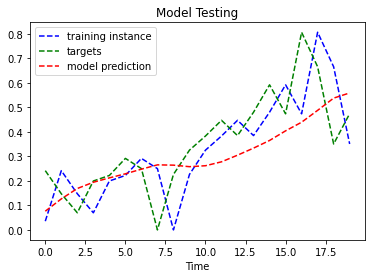

In [ ]:
loss, mse = model.evaluate(eval_x, eval_y, batch_size=batch_size)
print('Test loss: {:.4f}'.format(loss))
print('Test mse: {:.4f}'.format(mse))

# predict
y_pred = model.predict(eval_x)

# plot predicted sequence
plt.title("Model Testing", fontsize=12)
plt.plot(eval_x[0,:,0], "b--", markersize=10, label="training instance")
plt.plot(eval_y[0,:,0], "g--", markersize=10, label="targets")
plt.plot(y_pred[0,:,0], "r--", markersize=10, label="model prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

From the Keras LSTM code listing, the method tf.keras.layers.LSTM() is used to implement the LSTM recurrent layer. The attribute return_sequences is set to True to return the full sequence in the output sequence.